## Simulazione dell'esame di Metodi Numerici


## Esercizio 1


# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione. Richiamare il teorema che  garantisce che risolvere un sistema lineare con specifiche proprietà equivale a trovare il minimo di un opportuni funzionale quadratico.  [**Punti 2**]
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=4000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini di velocità di  convergenza alla soluzione di ciascuno dei due metodi, richiamando il risultato teorico visto a lezione. [**Punti 2**]

 - Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con elementi sulla
      diagonali tutti uguali a 0.05
   nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
   e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1.  Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]
  
   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``







In [67]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl

dati = loadmat('testI.mat')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

In [68]:
print(f'Dimensioni matrice: {A.shape}')
print(f'Matrice ben condizionata? {npl.cond(A) < 100}')
if np.all(A==A.T):
    print(f'La matrice è simmetrica')
    if np.all(npl.eigvals(A)>0):
        print(f'La matrice è definita positiva')
else:
    print(f'La matrice non è adatta ai metodi di discesa')
n,m = A.shape
print(f'La matrice è sparsa? {(np.count_nonzero(A)*100)/(n*n) < 33}')


Dimensioni matrice: (300, 300)
Matrice ben condizionata? False
La matrice è simmetrica
La matrice è definita positiva
La matrice è sparsa? True


Dall'output dello script precedente notiamo che la matrice è mal condizionata
questo implica che i due metodi avranno velcoità di convergenza bassa perché quest'ultima
dipende fortemente dal condizonamento della matrice.

In [69]:
toll=1e-6
maxit=4000
x0=np.array([0]*n).T

In [70]:
def steepestdescent(A,b,x0,maxit,toll):
 
  n,m=A.shape
  if n!=m:
    print("Matrice non quadrata")
    return [],[]
  # inizializzare le variabili necessarie
  x=x0 
  r=A@x-b
  p=-r
  it=0
  nb=np.linalg.norm(b)
  errore=np.linalg.norm(r)/nb
  vec_sol=[]
  vec_sol.append(x)
  vet_r=[]
  vet_r.append(errore)
    
# utilizzare il metodo del gradiente per trovare la soluzione
  while it<maxit and errore >= toll:  #to do
    it=it+1
    Ap=A@p                #to do
    num=-(r.T@Ap)
    alpha=num/(p.T@Ap)    #to do

    x=x+alpha*p           #to do

    vec_sol.append(x)
    r=r+alpha*Ap
    errore=np.linalg.norm(r)/nb
    vet_r.append(errore)
    p=-r                  #to do
      
  return x,vet_r,vec_sol,it

In [71]:
def conjugate_gradient(A,b,x0,maxit,toll):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
   # inizializzare le variabili necessarie
    x = x0
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= toll and it < maxit:
      it=it+1
      Ap=A@p  #to do
      rtr=r.T@r
      alpha=rtr/(p.T@Ap)  #to do
      x = x + alpha*p #to do
      vec_sol.append(x)
      rtr_old=r.T@r
      r=r+alpha*Ap
      gamma=(r.T@r)/rtr
      errore=np.linalg.norm(r)/nb
      vet_r.append(errore)
      p=-r+gamma*p #to do
    
    return x,vet_r,vec_sol,it

In [72]:
x1,vr1,vs1,it1 = steepestdescent(A,b,x0,maxit,toll)
x2,vr2,vs2,it2 = conjugate_gradient(A,b,x0,maxit,toll)
print(f'iterazioni discesa più ripida: {it1}, iterazioni gradiente congiunto: {it2}')

iterazioni discesa più ripida: 4000, iterazioni gradiente congiunto: 417


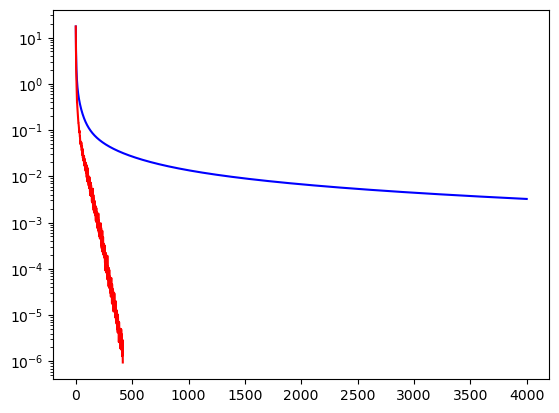

In [73]:
import matplotlib.pyplot as plt
plt.semilogy(vr1,'-b',vr2,'-r')
plt.show()

In [74]:
A=A+np.diag([0.5]*n)
b=np.sum(A,axis=1)

In [78]:
x1,vr1,vs1,it1 = steepestdescent(A,b,x0,maxit,toll)

x2,vr2,vs2,it2 = conjugate_gradient(A,b,x0,maxit,toll)
print(f'iterazioni discesa più ripida: {it1}, iterazioni gradiente congiunto: {it2}')

print(f'Matrice ben condizionata? {npl.cond(A) < 100}')


iterazioni discesa più ripida: 20, iterazioni gradiente congiunto: 11
Matrice ben condizionata? True


Dato che la matrice ora è ben condizionata il metodo del gradiente congiunto 
ha una convergenza molto più veloce e questo è solo una dimostrazione pratica
del risultato teorico ottenuto a lezione

## Esercizio 2 ##

Siano assegnati i numpy array

x =[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0] 

y =[1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59] 
                                                               
contenenti rispettivamente le ascisse e le ordinate di 11 punti nel piano.                                                          

Scrivere lo script python in cui:

- si calcola il polinomio di approssimazione ai minimi quadrati di grado 1 dei punti assegnati, sviluppando le functions necessarie. e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

- si calcola il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

- Si modifichino le ordinate dei punti assegnati, facendo uso della formula   $\hat{y_i}=2*x_i+1$, $i=1,...,11$, e si ricalcoli il polinomio interpolante ed il polinomio di approssimazione di grado 1, a partire dalle coppie $(x_i,\hat{y_i})$, $i=1,11$   [**Punti: 1**]

- Si visualizzi in un grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i punti $(x_i,y_i)$, $i=1,11$ ed in un altro grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i $(x_i,\hat{y_i})$, $i=1,11$  [**Punti:1**]

- Si fornisca una spiegazione teorica dei risultati ottenuti
  [**Punti: 4**]

                                                                        Totale 14 punti

## Domanda intelligenza artificiale

- Importanza del learning rate nell'allenamento di una rete neurale 
[**Punti: 1**]
- Illustra l'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi di tutti i layer, nel caso di una MLP con 1 nodo di input, 3 layer nascosti formati da un solo nodo, ed 1 nodo di output. [**Punti: 4**] 
 
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch. [**Punti: 2**]


    [**Totale: punti 7**]


Il learning rate è uno degli iperparametri più importanti nell'addestramento di una ANN, bisogna ponderare con precisione il suo valore poiché da esso dipende in la convergenza nel problema di minimizzazione della Loss Function e la velocità con cui esso converge. Valori troppo bassi richiederanno un numero di iterazioni eccessive mentre dei valori troppo alti faranno oscillare la soluzione tra dei punti attorno al minimo assoluto ricercato ma che non lo raggiungono mai. Gli algoritmi di LR adattivo puntano ad avere un learning rate variabile che si adatti al meglio all'andamento della convergenza, genericamente è ottimale un learning rate alto iniziale mentre nella fase finale della ricerca è preferibile un LR basso.